In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('data2.csv')

In [5]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

This value counts shows us that worlclass has ? values which does not tell us any information.
Therefore we will replace it by more frequent value which is Private

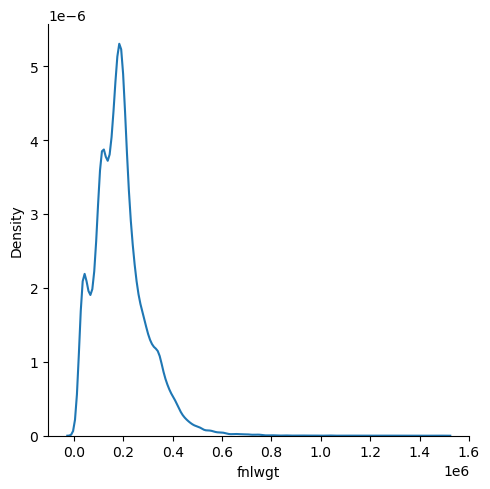

In [9]:
sns.displot(df['fnlwgt'],kind='kde')

<Axes: ylabel='fnlwgt'>

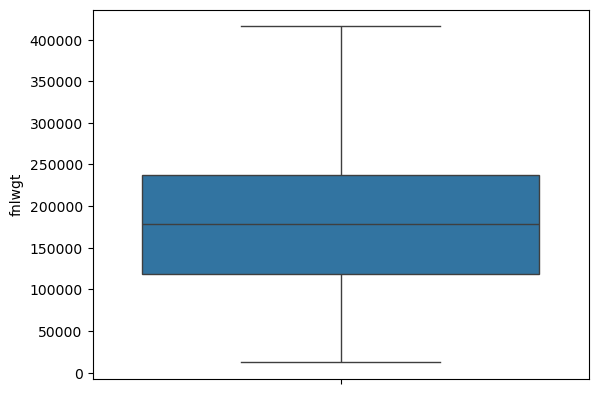

In [10]:
def outlier_handle(df,columns):
    for col in columns:
        percent25=df[col].quantile(0.25)
        percent75=df[col].quantile(0.75)
        iqr=percent75-percent25
        upper_limit=percent75+1.5*iqr
        lower_limit=percent25-1.5*iqr
        df[col]=np.where(
        df[col]>upper_limit,
        upper_limit,
        np.where(
            df[col]<lower_limit,
            lower_limit,
            df[col]
            )
        )
    
outlier_handle(df,['fnlwgt'])
sns.boxplot(df['fnlwgt'])

In [11]:
df['workclass']=df['workclass'].replace(to_replace='?',value='Private')

In [12]:
df['workclass'].value_counts()

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

<Axes: ylabel='age'>

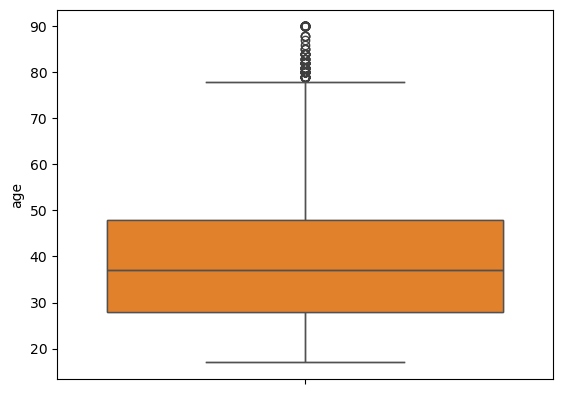

In [13]:
sns.boxplot(df['age'])
outlier_handle(df,['age'])
sns.boxplot(df['age'])

In [14]:
df['education.num'].value_counts()

education.num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

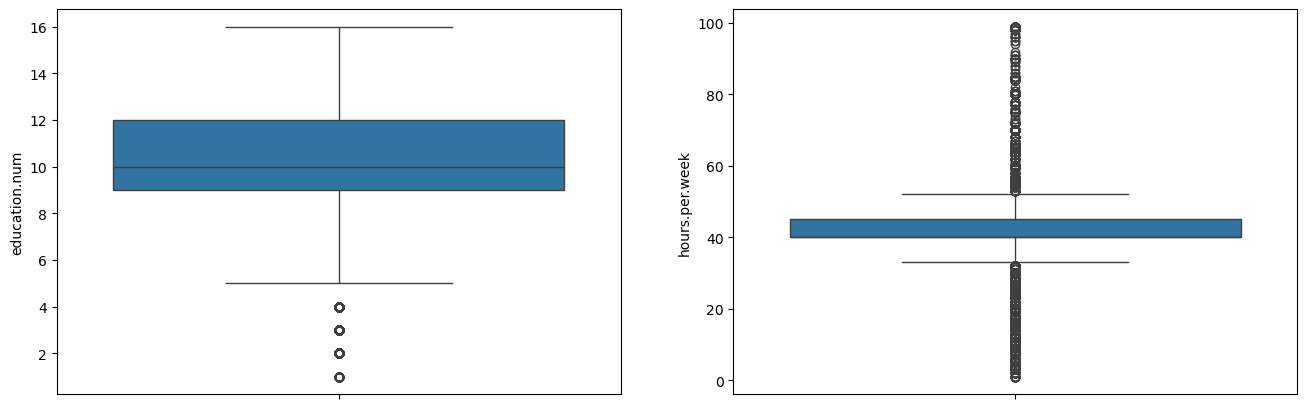

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['education.num'])

plt.subplot(1,2,2)

sns.boxplot(df['hours.per.week'])
plt.show()

In [16]:
df['education.num'].skew()

-0.31167586791022966

In [17]:
df['education.num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64

In [18]:
outlier_handle(df,['education.num','hours.per.week'])

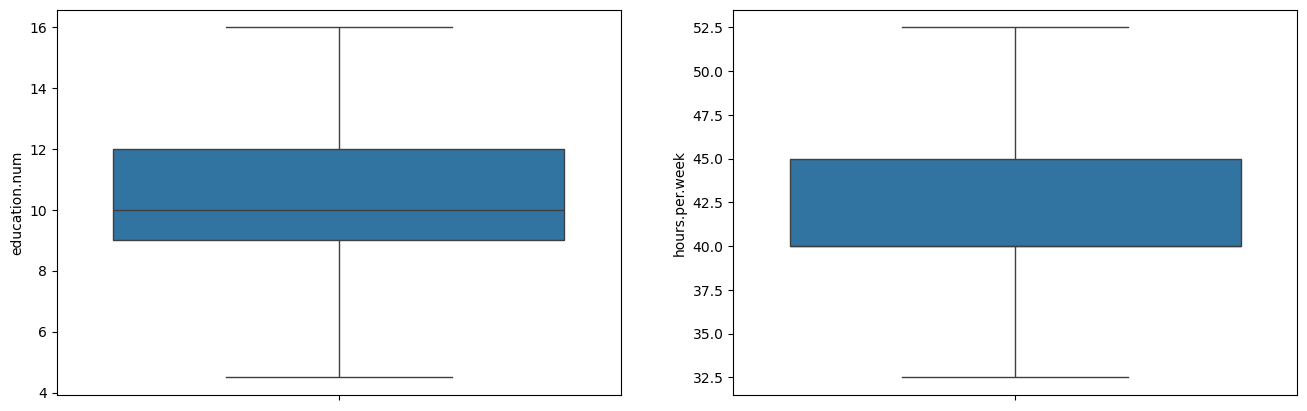

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['education.num'])

plt.subplot(1,2,2)

sns.boxplot(df['hours.per.week'])
plt.show()

In [20]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,Private,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0,4356,40.0,United-States,<=50K
1,78.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States,<=50K
2,66.0,Private,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0,4356,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States,<=50K


<Axes: ylabel='capital.gain'>

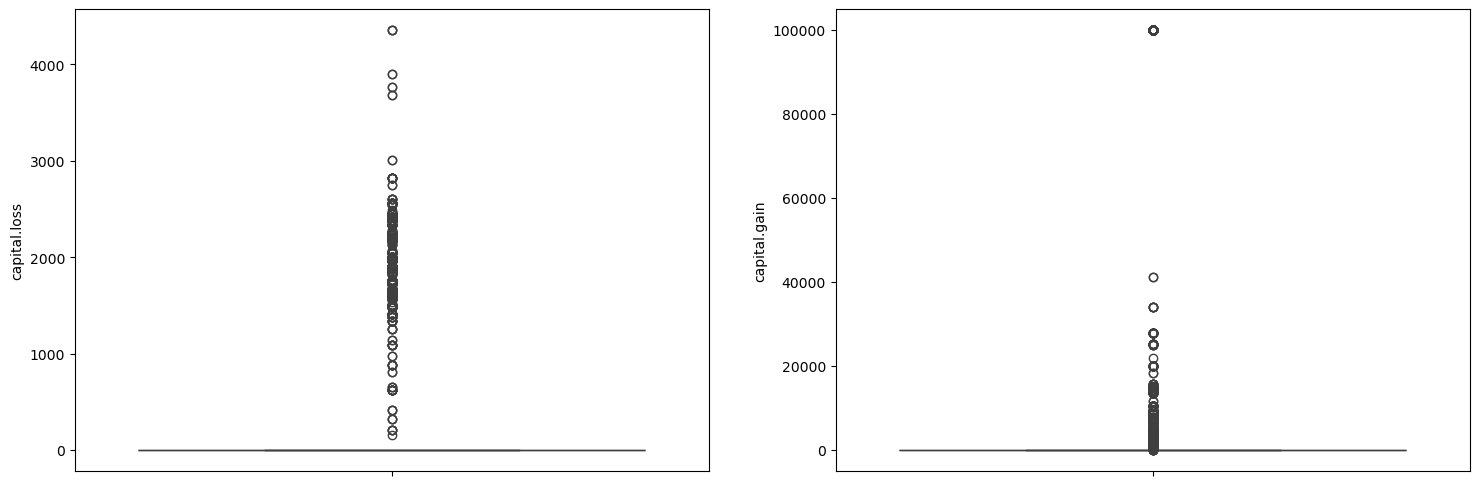

In [21]:
df['capital.gain'].value_counts()
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.boxplot(df['capital.loss'])

plt.subplot(1,2,2)
sns.boxplot(df['capital.gain'])

In [22]:
# sns.countplot(df['capital.gain'])

In [23]:
df['capital.gain'].skew()

11.953847687699794

In [24]:
# df['capital.gain']=np.log1p(df['capital.gain'])
# df['capital.loss']=np.log1p(df['capital.loss'])

In [25]:
print(df['capital.gain'].skew())
print(df['capital.loss'].skew())

11.953847687699794
4.594629121679696


In [26]:
# df=df.drop(['marital.status','relationship','race','sex'],axis=1)

In [27]:
# outlier_handle(df,['capital.gain'])
# sns.boxplot(df['capital.gain'])

In [28]:
df['capital.gain'].value_counts()

capital.gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: count, Length: 119, dtype: int64

In [29]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,Private,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0,4356,40.0,United-States,<=50K
1,78.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States,<=50K
2,66.0,Private,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0,4356,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States,<=50K


In [30]:
df['occupation'].value_counts()


occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [31]:
print(df['occupation'].mode())

0    Prof-specialty
Name: occupation, dtype: object


In [32]:
df['occupation']=df['occupation'].replace(to_replace='?',value='Prof-specialty')

In [33]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,Private,77053.0,HS-grad,9.0,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40.0,United-States,<=50K
1,78.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States,<=50K
2,66.0,Private,186061.0,Some-college,10.0,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States,<=50K
5,34.0,Private,216864.0,HS-grad,9.0,Divorced,Other-service,Unmarried,White,Female,0,3770,45.0,United-States,<=50K
6,38.0,Private,150601.0,10th,6.0,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40.0,United-States,<=50K
7,74.0,State-gov,88638.0,Doctorate,16.0,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,32.5,United-States,>50K
8,68.0,Federal-gov,415887.0,HS-grad,9.0,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40.0,United-States,<=50K
9,41.0,Private,70037.0,Some-college,10.0,Never-married,Craft-repair,Unmarried,White,Male,0,3004,52.5,?,>50K


In [34]:
# df['income']=df['income'].replace(to_replace='<=50K',value=0)
# df['income']=df['income'].replace(to_replace='>50K',value=1)
df['marital.status'].value_counts()

marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [35]:
df['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [36]:
df['native.country']=df['native.country'].replace(to_replace='?',value='United-States ')

<Axes: xlabel='income', ylabel='count'>

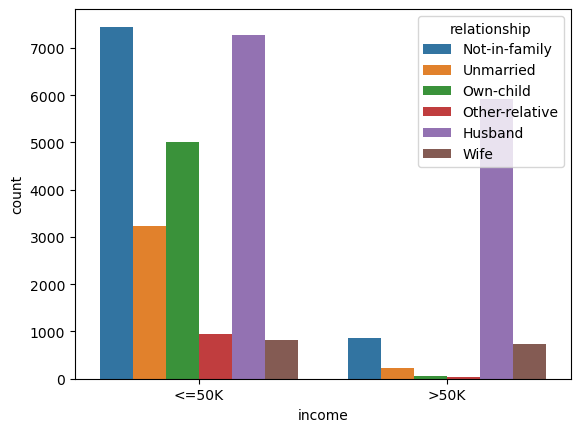

In [37]:
sns.countplot(x='income',hue='relationship',data=df)

<Axes: xlabel='income', ylabel='count'>

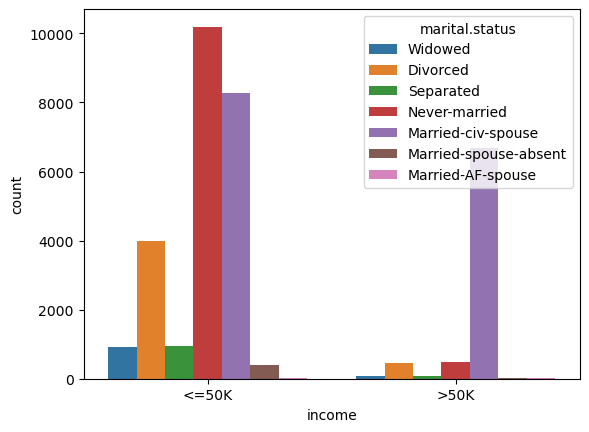

In [38]:
sns.countplot(x='income',hue='marital.status',data=df)


<Axes: xlabel='income', ylabel='count'>

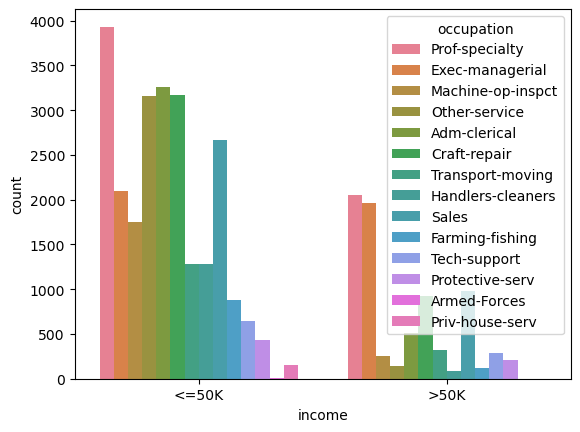

In [39]:
sns.countplot(x='income',hue='occupation',data=df)

<Axes: xlabel='income', ylabel='hours.per.week'>

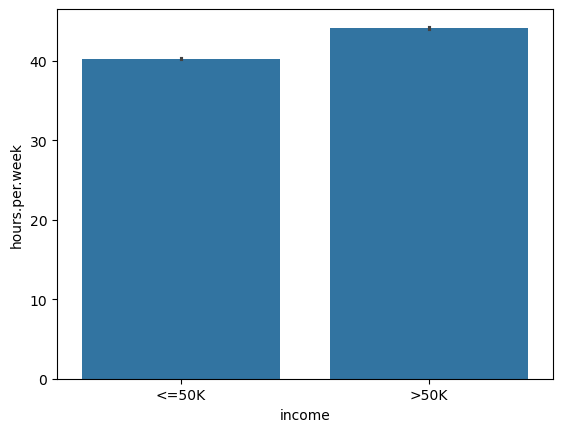

In [40]:
sns.barplot(x='income',y='hours.per.week',data=df)

<Axes: xlabel='income', ylabel='count'>

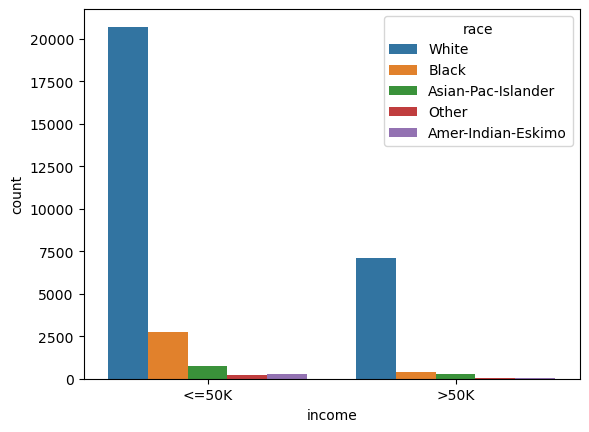

In [41]:
sns.countplot(x='income',hue='race',data=df)


In [42]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,Private,77053.0,HS-grad,9.0,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40.0,United-States,<=50K
1,78.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States,<=50K
2,66.0,Private,186061.0,Some-college,10.0,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States,<=50K


In [43]:
df['native.country'].value_counts()

native.country
United-States                 29170
Mexico                          643
United-States                   583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [44]:
# df=df.drop(['native.country'],axis=1)

In [45]:
# df=pd.get_dummies(df,columns=['workclass','education','occupation','income','native.country'],drop_first=True,dtype=int)

In [46]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,Private,77053.0,HS-grad,9.0,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40.0,United-States,<=50K
1,78.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States,<=50K
2,66.0,Private,186061.0,Some-college,10.0,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States,<=50K
5,34.0,Private,216864.0,HS-grad,9.0,Divorced,Other-service,Unmarried,White,Female,0,3770,45.0,United-States,<=50K
6,38.0,Private,150601.0,10th,6.0,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40.0,United-States,<=50K
7,74.0,State-gov,88638.0,Doctorate,16.0,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,32.5,United-States,>50K
8,68.0,Federal-gov,415887.0,HS-grad,9.0,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40.0,United-States,<=50K
9,41.0,Private,70037.0,Some-college,10.0,Never-married,Craft-repair,Unmarried,White,Male,0,3004,52.5,United-States,>50K


In [47]:
df.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education.num     float64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain        int64
capital.loss        int64
hours.per.week    float64
native.country     object
income             object
dtype: object

In [48]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
for col in df.columns:
    if df[col].dtype==object:
        df[col]=lbl.fit_transform(df[col])

In [49]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,3,77053.0,11,9.0,6,9,1,4,0,0,4356,40.0,38,0
1,78.0,3,132870.0,11,9.0,6,3,1,4,0,0,4356,32.5,38,0
2,66.0,3,186061.0,15,10.0,6,9,4,2,0,0,4356,40.0,38,0
3,54.0,3,140359.0,5,4.5,0,6,4,4,0,0,3900,40.0,38,0
4,41.0,3,264663.0,15,10.0,5,9,3,4,0,0,3900,40.0,38,0
5,34.0,3,216864.0,11,9.0,0,7,4,4,0,0,3770,45.0,38,0
6,38.0,3,150601.0,0,6.0,5,0,4,4,1,0,3770,40.0,38,0
7,74.0,6,88638.0,10,16.0,4,9,2,4,0,0,3683,32.5,38,1
8,68.0,0,415887.0,11,9.0,0,9,1,4,0,0,3683,40.0,38,0
9,41.0,3,70037.0,15,10.0,4,2,4,4,1,0,3004,52.5,39,1


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [51]:
y=df['income']
X=df.drop(['income'],axis=1)

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()

# scaler.fit(X_train)
# X_train_scaled=scaler.transform(X_tarin)
# X_test_scaled=scaler.transform(X_test)

In [54]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
rfc=RandomForestClassifier(random_state=42)
param_grids={
    'n_estimators': [50, 100, 200],  
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]    
}
# grid_search=GridSearchCV(estimator=rfc,param_grid=param_grids,verbose=2,cv=5,n_jobs=-1)
# grid_search.fit(X_train,y_train)

# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)

# # Optionally, you can evaluate on the test set
# best_rf = grid_search.best_estimator_
# test_score = best_rf.score(X_test, y_test)
# print("Test set score:", test_score)

In [58]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
rfc.fit(X_train,y_train)

y_pred_regg=clf.predict(X_test)
y_pred_tree=clf2.predict(X_test)
y_pred_rand=rfc.predict(X_test)


print("Accuracy using LogisticRegression",accuracy_score(y_test,y_pred_regg))
print("Accuracy using DecisionTreeClassifier",accuracy_score(y_test,y_pred_tree))
print("Accuracy using Random Forest Classifer",accuracy_score(y_test,y_pred_rand))

C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy using LogisticRegression 0.796714263780132
Accuracy using DecisionTreeClassifier 0.8143712574850299
Accuracy using Random Forest Classifer 0.8570551205281745


In [56]:
print("Logistic Regression",np.mean(cross_val_score(clf,X_train,y_train,cv=10)))
print("Decison tree classifer",np.mean(cross_val_score(clf2,X_train,y_train,cv=10)))
print("Random forest Classifer",np.mean(cross_val_score(rfc,X_train,y_train,cv=10)))

C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression 0.796376370621309
Decison tree classifer 0.8084690023616407
Random forest Classifer 0.856303619708053


In [59]:
# from sklearn.decomposition import 

In [60]:
print("Precision using LogisticRegression",precision_score(y_test,y_pred_regg))
print("Precision using DecisionTreeClassifier",precision_score(y_test,y_pred_tree))
print("Precision using rcf",precision_score(y_test,y_pred_rand))

Precision using LogisticRegression 0.6878306878306878
Precision using DecisionTreeClassifier 0.6048593350383632
Precision using rcf 0.7320061255742726


In [61]:
print(classification_report(y_pred_regg,y_test))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      5946
           1       0.25      0.69      0.37       567

    accuracy                           0.80      6513
   macro avg       0.61      0.75      0.62      6513
weighted avg       0.90      0.80      0.83      6513



In [62]:
print(classification_report(y_pred_tree,y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4949
           1       0.62      0.60      0.61      1564

    accuracy                           0.81      6513
   macro avg       0.75      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



In [63]:
print(classification_report(y_pred_rand,y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5207
           1       0.62      0.73      0.67      1306

    accuracy                           0.86      6513
   macro avg       0.78      0.81      0.79      6513
weighted avg       0.87      0.86      0.86      6513

